In [1]:
import tdmclient.notebook
await tdmclient.notebook.start()

import os
import sys
import math
from statistics import mean
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

from sklearn.linear_model import LinearRegression

sys.path.insert(0, os.path.join(os.getcwd(), 'sensors'))
sys.path.insert(0, os.path.join(os.getcwd(), 'global_map'))
sys.path.insert(0, os.path.join(os.getcwd(), 'tools'))
from sensors import obstacles_pos
from local_occupancy import sensor_measurements, sensor_distances
from local_occupancy import thymio_coords, sensor_pos_from_center, sensor_angles
from map_global import create_map_global, update_map
from linear_regression import linear_regression
from count_group import count_transitions, count_group

%matplotlib inline

In [2]:
# Init Position
#math.pi/2
abs_pos = [[20, 20, 0]] # absolute x,y,theta coordinates of the robot
# Goal Position
goal_position = [[80, 80]]

Unchecked ExtSlice(dims=[Slice(lower=None, upper=None, step=None), Index(value=Num(n=0))])
Unchecked ExtSlice(dims=[Slice(lower=None, upper=None, step=None), Index(value=Num(n=1))])
Unchecked ExtSlice(dims=[Slice(lower=None, upper=None, step=None), Index(value=Num(n=0))])
Unchecked ExtSlice(dims=[Slice(lower=None, upper=None, step=None), Index(value=Num(n=1))])


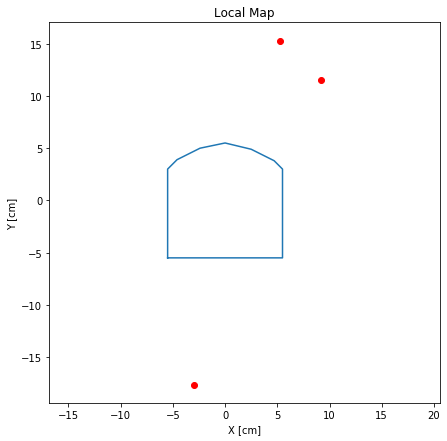

In [3]:
# Get sensors values
sensor_vals = prox_horizontal

# Exchange rear elements to represent view from above
sensor_vals[5], sensor_vals[6] = sensor_vals[6], sensor_vals[5]

# Compute position of obstacles
obstacles_pos = obstacles_pos(sensor_vals, sensor_measurements, sensor_distances, sensor_pos_from_center, sensor_angles)

# Plot the local map
plt.figure(figsize=(7,7))
plt.title("Local Map")
plt.xlabel("X [cm]")
plt.ylabel("Y [cm]")
# Plot shape of Thymio
plt.plot(thymio_coords[:,0], thymio_coords[:,1])
plt.axis("equal")
plt.scatter(obstacles_pos[:,0], obstacles_pos[:,1], marker="o", color="r")

Unchecked ExtSlice(dims=[Slice(lower=None, upper=None, step=None), Index(value=Num(n=0))])
Unchecked ExtSlice(dims=[Slice(lower=None, upper=None, step=None), Index(value=Num(n=1))])


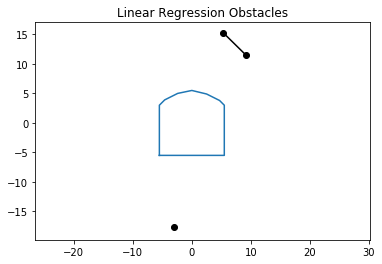

In [4]:
# Compute linear regression of lines from front and back

# Front
data = obstacles_pos[0:5]
X, y_pred, mask = linear_regression(data)

# Back
data_back = obstacles_pos[5:8]
X_back, y_pred_back, mask_back = linear_regression(data_back)


## Plot

# Front
plt.title("Linear Regression Obstacles")
plt.plot(X, y_pred, color='black', label='Regression line')
plt.scatter(X[mask], y_pred[mask], color='black', label='Isolated Points')  # Scatter plot for isolated points

# Back
plt.plot(X_back, y_pred_back, color='black', label='Regression line')
plt.scatter(X_back[mask_back], y_pred_back[mask_back], color='black', label='Isolated Points')  # Scatter plot for isolated points

# Plot shape of Thymio
plt.plot(thymio_coords[:,0], thymio_coords[:,1])
plt.axis("equal")

plt.show()


# Calculate the angle of the normal vector
#slope = model.coef_[0][0]
#angle_radians = np.arctan(slope)-math.pi/2

In [5]:
# Create Global Map
map_global = create_map_global()

# Add Local map to Global map -> when switch back to global navigation
#map_global = update_map(abs_pos, map_global, obstacles_pos)

# Compute absolute values
# Rotation matrix
theta = abs_pos[0][2]
rotation_matrix = np.array([[np.cos(theta), -np.sin(theta)],
                           [np.sin(theta), np.cos(theta)]])
# Thymio
thymio_coords_rotated = np.dot(thymio_coords, rotation_matrix)
thymio_X = abs_pos[0][0]+thymio_coords_rotated[:,0]
thymio_y = abs_pos[0][1]+thymio_coords_rotated[:,1]

# Front obstacles
front_obst_coords = np.column_stack((X, y_pred))
front_obst_coords_rotated = np.dot(front_obst_coords, rotation_matrix)
front_obst_X = front_obst_coords_rotated[:, 0]+abs_pos[0][0]
front_obst_y = front_obst_coords_rotated[:, 1]+abs_pos[0][1]

# Back obstacles
back_obst_coords = np.column_stack((X_back, y_pred_back))
back_obst_coords_rotated = np.dot(back_obst_coords, rotation_matrix)
back_obst_X = back_obst_coords_rotated[:, 0]+abs_pos[0][0]
back_obst_y = back_obst_coords_rotated[:, 1]+abs_pos[0][1]




Unchecked ExtSlice(dims=[Slice(lower=None, upper=None, step=None), Index(value=Num(n=0))])
Unchecked ExtSlice(dims=[Slice(lower=None, upper=None, step=None), Index(value=Num(n=1))])
Unchecked ExtSlice(dims=[Slice(lower=None, upper=None, step=None), Index(value=Num(n=0))])
Unchecked ExtSlice(dims=[Slice(lower=None, upper=None, step=None), Index(value=Num(n=1))])
Unchecked ExtSlice(dims=[Slice(lower=None, upper=None, step=None), Index(value=Num(n=0))])
Unchecked ExtSlice(dims=[Slice(lower=None, upper=None, step=None), Index(value=Num(n=1))])


Unchecked ExtSlice(dims=[Slice(lower=None, upper=None, step=None), Index(value=Num(n=1))])
Unchecked ExtSlice(dims=[Index(value=Num(n=1)), Slice(lower=None, upper=None, step=None)])
[0, 1, 2, 5, -2, -4]
possible_path_angles
40.0
possible_path_angles
20.0
possible_path_angles
0.0
possible_path_angles
-140.0
possible_path_angles
-59.99999999999999
possible_path_angles
90.0
Angle to goal 45.0
Closest Angle to Goal: 40.0


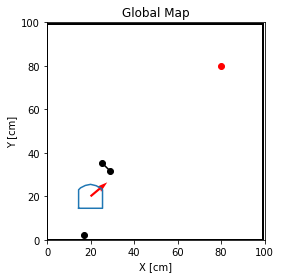

In [6]:
# Plot global map
plt.imshow(map_global, cmap='binary', origin='upper')
plt.title("Global Map")
plt.xlim(0, len(map_global[:,1]))
plt.ylim(0, len(map_global[1,:]))
plt.xlabel("X [cm]")
plt.ylabel("Y [cm]")
# Plot goal
plt.scatter(goal_position[0][0], goal_position[0][1], color='red')
# Plot thymio
plt.plot(thymio_X, thymio_y)
# Plot obstacles
# Front
plt.plot(front_obst_X, front_obst_y, color='black', label='Regression line')
# Scatter plot
isolated_points_indices = np.where(mask)[0]  # Get indices where mask is True
isolated_points_X = front_obst_coords_rotated[isolated_points_indices, 0] + abs_pos[0][0]
isolated_points_y = front_obst_coords_rotated[isolated_points_indices, 1] + abs_pos[0][1]
plt.scatter(isolated_points_X, isolated_points_y, color='black', label='Isolated Points')

# Back
plt.plot(back_obst_X, back_obst_y, color='black', label='Regression line')
# Scatter plot
isolated_points_indices_back = np.where(mask_back)[0]  # Get indices where mask is True
isolated_points_X_back = back_obst_coords_rotated[isolated_points_indices_back, 0] + abs_pos[0][0]
isolated_points_y_back = back_obst_coords_rotated[isolated_points_indices_back, 1] + abs_pos[0][1]
plt.scatter(isolated_points_X_back, isolated_points_y_back, color='black', label='Isolated Points')

# temporary
# Calculate the angle to reach the goal in a straight line
delta_x = goal_position[0][0] - abs_pos[0][0]
delta_y = goal_position[0][1] - abs_pos[0][1]
angle_to_goal = math.atan2(delta_y, delta_x)-abs_pos[0][2]




# Filter value to create extra wall, constraints
# Compute number of group
nb_grouph, mask, mask_back = count_group(mask, mask_back, X, y_pred, X_back, y_pred_back)

# Number of possible path
if nb_grouph == 1:
    nb_path = 2
else:
    nb_path = nb_grouph

# Find best path
possible_path = []

# Look if possible in front
for i in range(len(mask.flatten())):
    current_value = mask.flatten()[i]
    if mask[i]==0:
        possible_path.append(i)
        
# Look if possible in back
for i in range(len(mask_back.flatten())):
    current_value = mask_back.flatten()[i]
    if mask_back[i]==0:
        possible_path.append(i+5)
        
# Add edge front
if mask[0]==1:
    possible_path.append(-1)
if mask[4]==1:
    possible_path.append(-2)

# Add edge back
if mask_back[0]==1:
    possible_path.append(-3)
if mask_back[1]==1:
    possible_path.append(-4)

print(possible_path)
# Convert possible_path to angles
angle_mapping = {
    6: 140, -4: 90,-1: 60, 0: 40, 1: 20, 2: 0, 3: -20, 4: -40, -2: -60, -3: -90, 5: -140
}

possible_path_angles = []

for i, state in enumerate(possible_path):
    # Check if the state has a corresponding angle in the mapping
    if state in angle_mapping:
        # Convert degrees to radians
        angle_in_radians = math.radians(angle_mapping[state])
        possible_path_angles.append(angle_in_radians)
        
for angle in possible_path_angles:
    print("possible_path_angles")
    print(math.degrees(angle))

# Choose angle closest to angle_to_goal
closest_angle = min(possible_path_angles, key=lambda x: abs(x - angle_to_goal))

print("Angle to goal", math.degrees(angle_to_goal))
print("Closest Angle to Goal:", math.degrees(closest_angle))

# Plot the best angle to exit local location
x, y, angle = abs_pos[0][:]
dx = math.cos(closest_angle)#angle_radians
dy = math.sin(closest_angle)#closest_angle
plt.quiver(x, y, dx, dy, angles='xy', scale_units='xy', scale=0.1, color='r', width=0.01)


plt.show()

In [7]:
# 
#if collision():
    #local_localization()


# Avoidment Reaction if obstacles detected
# angle = normal of lines
# u = 


'''
# Set all value from absolute position
for pos in obstacles_pos:
    print(pos)
    print(abs_pos[-1][0])
    if not math.isinf(pos[0] or pos[1]):
        rounded_x_indices = np.round(abs_pos[-1][0] + pos[0], 1).astype(int)
        rounded_y_indices = np.round(abs_pos[-1][1] + pos[1], 1).astype(int)
print(rounded_x_indices)
print('')
print(rounded_y_indices)
for x, y in zip(rounded_x_indices, rounded_y_indices):
    map_global[x, y] = 1
'''

"\n# Set all value from absolute position\nfor pos in obstacles_pos:\n    print(pos)\n    print(abs_pos[-1][0])\n    if not math.isinf(pos[0] or pos[1]):\n        rounded_x_indices = np.round(abs_pos[-1][0] + pos[0], 1).astype(int)\n        rounded_y_indices = np.round(abs_pos[-1][1] + pos[1], 1).astype(int)\nprint(rounded_x_indices)\nprint('')\nprint(rounded_y_indices)\nfor x, y in zip(rounded_x_indices, rounded_y_indices):\n    map_global[x, y] = 1\n"

In [8]:
# Get speed
#dx,dy,dtheta = 

# Provided the relative positions, compute the absolute positions at each step
#for (dx,dy,dtheta) in rel_dpos[:]:
    #(x,y,theta) = abs_pos[-1][0], abs_pos[-1][1], abs_pos[-1][2]
    #d = np.sqrt(dx**2+dy**2)
    #new_pos = [x+d*np.cos(theta+dtheta), y+d*np.sin(theta+dtheta), (theta+dtheta)%(2*math.pi)]
    # Appending the computed absolute x, y and theta coordinates to the list
    #abs_pos.append(new_pos)

#abs_pos = np.array(abs_pos)